# Solution hints for exercise sheet 7

## Exercise 1

You proceed exactly as in the proof of Theorem 9.4. At some point, you represent the action of the Lie bracket in terms of a matrix, w.r.t. the canonical basis of homogeneous polynomials of degree 2, i.e., ${(x,y)\mapsto x^2,(x,y)\mapsto xy,(x,y)\mapsto y^2}$ in the first and in the second component. This matrix representation is given by:

In [1]:
L = [0 0 0 1 0 0;
    -2 0 0 0 1 0;
    0 -1 0 0 0 1;
    0  0 0 0 0 0;
    0 0 0 -2 0 0;
    0 0 0 0 -1 0]

6×6 Array{Int64,2}:
  0   0  0   1   0  0
 -2   0  0   0   1  0
  0  -1  0   0   0  1
  0   0  0   0   0  0
  0   0  0  -2   0  0
  0   0  0   0  -1  0

The next thing to address is to find a basis of some complement of the image of $L$. First, what is the image of $L$ anyway? To answer this, it is best to compute a *singular value decomposition (SVD)*, and look at the singular vectors corresponding to nonzero singular values.

In [2]:
F = svdfact(L)
F[:S]

6-element Array{Float64,1}:
  2.28825    
  2.23607    
  1.41421    
  0.874032   
  7.85046e-17
 -0.0        

Clearly, we have 4 singular values significantly different from 0. This is consistent with:

In [3]:
rank(L)

4

In other words, this is an orthonormal basis of the image of $L$:

In [4]:
F[:U][:,1:4]

6×4 Array{Float64,2}:
  0.0        0.447214  0.0   0.0     
  0.973249   0.0       0.0  -0.229753
  0.0        0.0       1.0   0.0     
  0.0        0.0       0.0   0.0     
  0.0       -0.894427  0.0   0.0     
 -0.229753   0.0       0.0  -0.973249

just like (with the magic eye)

In [5]:
L[:,[1, 2, 4, 5]]

6×4 Array{Int64,2}:
  0   0   1   0
 -2   0   0   1
  0  -1   0   0
  0   0   0   0
  0   0  -2   0
  0   0   0  -1

It remains to find a basis for some complementary subspace. Algorithmically, this is best done using the singular vectors corresponding to vanishing singular values, i.e.,

In [6]:
F[:U][:,5:6]

6×2 Array{Float64,2}:
 -0.894427  0.0
  0.0       0.0
  0.0       0.0
  0.0       1.0
 -0.447214  0.0
  0.0       0.0

Here seems to be an issue, because the first vector has a $(x,y)\mapsto x^2$-component. However, we are not forced to use a basis of the orthogonal complement of the image of $L$, but can use a "sparser" one, indicated by the exercise sheet (it remains open how to see this solution when you're not given the solution). Let's check whether the indicated basis vectors indeed complement the image of $L$.

In [7]:
add_basis = [0 0; 0 0; 0 0; 0 1; 1 0; 0 0]
rank(hcat(L, add_basis))

6

Clearly, the additional vectors are linearly independent from the basis vectors of the image of $L$. The claimed result follows along the lines of Theorem 9.4.

## Exercise 2 & 3

These can be solved along the lines demonstrated in the lecture (notes).

## Exercise 4

We want to reproduce the following root behaviour of $f$:

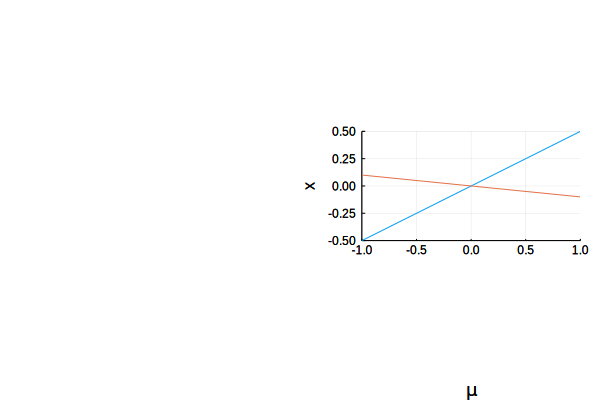

In [8]:
using Plots
μ = linspace(-1.,1.,51)
f₁ = x -> 0.5x # first curve of equilibria
f₂ = x -> -0.1x # second curve of equilibria
plot(plot(μ,f₁),plot!(μ,f₂),xlabel="\\mu",ylabel="x",leg=false,aspect_ratio=1)

In words: we want two curves of roots to cross each other at $(0,0)$ at a nonvanishing angle, and each root (for each $\mu$) is hyperbolic except for $\mu=0$. Since $x=0$ is an equilibrium for $\mu=0$, we must have:

$$
f(0,0) = 0.
$$

One approach to translate the root scenario into an equation is to say that $f = g*h$, where $g$ has a unique root along one curve, and $h$ along the other. Additionally assuming that one root curve is $x^*(\mu)=0$ sets, say, $g\colon x\mapsto x$.

Next, assume we had $\partial_x f(0,0)\neq 0$ or $\partial_{\mu} f(0,0)\neq 0$. Then we could continue the root uniquely (by the Implicit Function Theorem) as a function of $\mu\mapsto x(\mu)$ and $x\mapsto \mu(x)$, respectively. This is in contrast to our crossing behaviour, which violates any unique root continuation. So we must have:

$$
\partial_x f(0,0) = 0,\qquad \partial_{\mu}f(0,0) = 0.
$$

Finally, we want that both root-graphs intersect at a finite angle. Let's assume that one root is given by $x^* = 0$. We want that the other curve of roots exists on both sides, and therefore need to exclude possibly degenerate crossing behaviour like this


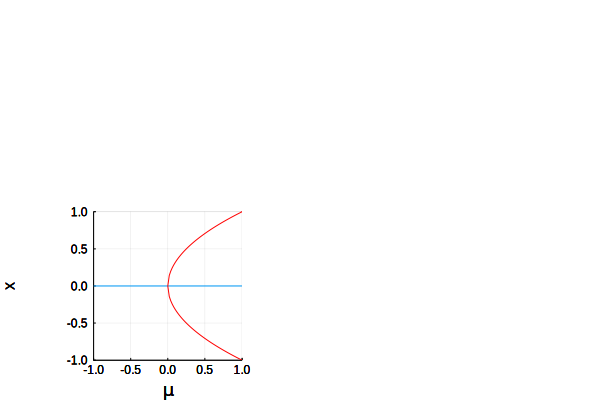

In [9]:
μpos = linspace(0.,1.,51)
f₁ = x -> 0. # first curve of equilibria
f₂ = x -> √x # second curve of equilibria
f₃ = x -> -√x
plot(plot(μ,f₁),plot!(μpos,f₂,color=:red),plot!(μpos,f₃,color=:red),xlabel="\\mu",ylabel="x",leg=false,aspect_ratio=1)

Instead, we want something like:

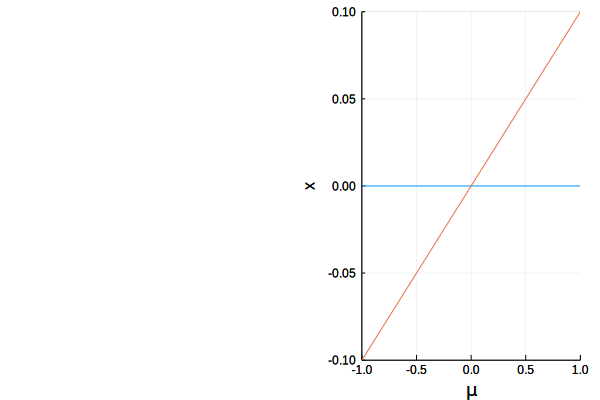

In [10]:
μ = linspace(-1.,1.,51)
f₁ = x -> 0.
f₂ = x -> 0.1x # second curve of equilibria
plot(plot(μ,f₁),plot!(μ,f₂),xlabel="\\mu",ylabel="x",leg=false)

In other words, the "non-zero" root is supposed to be uniquely representable as a graph both over $x$ and over $\mu$. The vector field with the zero-root factored out reads as:

$$
F(x,\mu) = \begin{cases} \frac{f(x(\mu)}{x}, & x\neq0\\ \partial_x f(0,\mu), & x=0.\end{cases}
$$

The graph representability is assured by the Implicit Function Theorem applied to $F$ at $(0,0)$ (we used the same argument in our contradiction argument above), if:

$$
\partial_x F(0,0) = \partial_x^2 f(0,0) \neq 0, \qquad \partial_{\mu}F(0,0) = \partial_{\mu}\partial_x f(0,0)\neq 0.
$$